## Homework II: Logistic Regression, SVM and some computational drug design

__Given date:__ Saturday March 7 

__Due date:__ Tuesday March 31

__Total__ : 30 pts + Bonus (One of the bonus question is on 3pts. For the other, it depends on what you can do)

# __Student: Muhammad Wajahat Mirza__

# **NetID: mwm356**

<img src="computationalDrugDiscovery.png" width="400">

### Exercise I.1. Logistic regression (10pts)

Use the lines below to load the variables __HW2_ExI_X__ and __HW2_ExI_Y__. In this first exercise, you will learn a logistic regression classifier on this dataset. Recall that the logistig regression model takes the form

$$p(t=1|\mathbf{x}) = \sigma(\mathbf{\beta}^T\tilde{\mathbf{x}})$$

where $\tilde{\mathbf{x}} = [1, \mathbf{x}] = [1, x_1, x_2, \ldots, x_D]$. Consequently, we thus have 

$$p(t = 0|\mathbf{x}) = 1 - \sigma(\mathbf{\beta}^T\tilde{\mathbf{x}})$$

we can then write the total probability that a point $\mathbf{x}$ will be from class $c = \left\{0,1\right\}$ as 

$$p(t = c|\mathbf{x}) = p(t = 1|\mathbf{x})^{c} p(t = 0|\mathbf{x})^{1-c} $$

or equivalently

$$p(t = c|\mathbf{x}) = (\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}))^{c} (1-\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}))^{1-c}  = p^c (1-p)^{1-c}$$

which is a binomial distribution with probability of success $\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}})$. If we assume that all the samples are independent, the probability of observing the dataset can read as the product

$$p(\left\{\mathbf{x}_i, t_i\right\}) = \prod_{i=1}^N p(t = t(\mathbf{x}_i)|\mathbf{x}_i)\quad  (*)$$

We can then try to learn the parameters $\mathbf{\beta}$ that maximize this probability (i.e such that the probability $p(t = t_i |\mathbf{x}_i)$ is high for every sample pair in the dataset. To do this, we take the negative logarithm of $(*)$ which gives 

$$-\log \prod_{i=1}^N p(t = t(\mathbf{x}_i)|\mathbf{x}_i) = -\sum_{i=1}^N c_i \log(\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}_i)) - \sum_{i=1}^N (1-c_i)\log(1-\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}_i}))\quad  (**)$$

and find the $\mathbf{\beta}$ that minimizes this expression.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


X = np.load('Ex1_HW2_X.npy') 
Y = np.load('Ex1_HW2_t.npy') 


X_class1 = X[Y==0,:]
X_class2 = X[Y==1,:]

plt.scatter(X_class1[:, 0], X_class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(X_class2[:, 0], X_class2[:, 1], marker='o', c='b',
            s=35)

plt.show()


<Figure size 640x480 with 1 Axes>

# __Question I.1.1 Logistic from scratch (7pts)__ 
Write a function that takes as inputs a set of training pairs $\left\{\mathbf{x}_i, t_i\right\}$ such as those stored in the variables $\texttt{HW2_ExI_X}$ and $\texttt{HW2_ExI_Y}$, and return the logistic regression classifier by learning it through gradient descent from the minimization of the negative log likelihood function $(**)$. Apply your function to the dataset given above and plot the discriminant function on top of this dataset.


# Solution

# 1. Mathematical base

**Our Goal is:**  $ 0  \leq h_\beta (x)  \leq 1 $
 
For that, we define our Sigmoid Function as: 

$$ h_{(\beta)}(x) = \sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}) = \frac{\mathrm{1} }{\mathrm{1} + e^{- \beta^Tx}} $$

Assign discrete value of $ 0 $  or $1$ to our dataset by using **Decision Boundary** through:

$$ h_\beta (x) \geq 0.5 \Rightarrow t = \mathrm{1} $$
$$ h_\beta (x) < 0.5 \Rightarrow t = \mathrm{0} $$

__Cost Function__

$$ l_{(\beta)} = -\frac{1}{N}\sum_{i=1}^N (t^{(i)}(\log (h_\beta (x^{(i)})) + ((1 - t^{(i)})(\log(1 - h_\beta (x^{(i)}))$$

**Vectorized form**

$$ h = \sigma(X\beta)  = \frac{\mathrm{1} }{\mathrm{1} + e^{-X\beta}} $$
$$ l_{(\beta)} = \frac{1}{N} ((- t ^ T \log(h)) - ((1-t)^Tlog(1-h)))$$

__Gradient Descent__ 

$$ \beta_{j} := \beta_{j} - \eta .\frac{1}{N} \sum_{i=1}^N(h_\beta (x^{(i)}) - t^{(i)}).x_{j}^{(i)}) $$
where $$ h_\beta (x^{(i)}) = \frac{\mathrm{1} }{\mathrm{1} + e^{- \beta^Tx^{(i)}}} $$
**Vectorized Form:** 
$$ \beta_{j} := \beta_{j} - \eta .\frac{1}{N}.X^T(\sigma(X\beta) - \overrightarrow{t}) $$

# 2. Programming

In [1]:
# start by coding the sigmoid function. 
def sigmoid(X, beta):  
    beta_x = np.dot(X, beta[1:]) + beta[0]
    sigmoid  = np.true_divide(1, (1+np.exp(-beta_x)))
    return sigmoid

def Cost_function(Y,X_beta):
    loss_beta = np.sum((-Y.dot(np.log(X_beta)) - ((1-Y).dot(np.log(1 - X_beta))))).mean()
    return loss_beta

def gradient_descent(X,Y,beta,eta,num_iter):
    cost = []
    for i in range(num_iter):
        X_beta = sigmoid(X,beta)
        error = X_beta - Y
        gradient = X.T.dot(error)
        beta[0] = beta[0] - eta * error.sum()
        beta[1:] = beta[1:] - eta * gradient
        cost.append(Cost_function(Y, X_beta))
        ''' IF you want to check Cost, uncomment following lines'''
#         if (i % 20 == 0):
#             print("iter: {}  cost={}".format(i, cost))
#     print("This is COST: ", cost)
    
    return cost, beta

In [3]:
def logistic_regression(X,num_iter):
    m, N = X.shape
    beta = np.zeros(1 + N)
    eta = 0.01
    cost, beta = gradient_descent(X, Y, beta, eta, num_iter)
    
    plt.plot(range(1, len(cost) + 1), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Logistic Regression')
    
    print ('Logisitc Regression bias:', beta[0])
    print ('Logisitc Regression coefficients :', beta[1:])
    
    return beta

# def boundary_line(X,beta):
#     decrete_0_1 = np.where(sigmoid(X,beta) >= 0.5, 1, 0)
#     return decrete_0_1
# boundary_line(X,beta)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

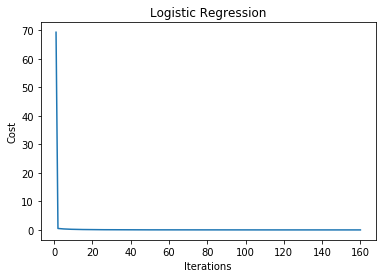

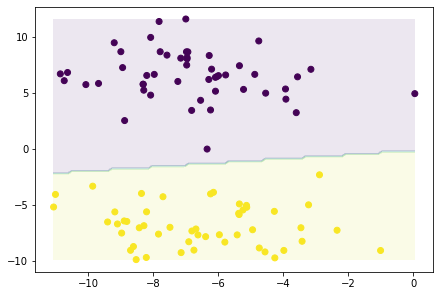

In [4]:
# First way to plot using class lab code. My problem is with the prediction line
def plot_boundary_line(X,Y,beta):
    x1min = np.amin(X[:,0])
    x1max = np.amax(X[:,0])

    x2min = np.amin(X[:,1])
    x2max = np.amax(X[:,1])

    x1mesh = np.linspace(x1min, x1max, 100)
    x2mesh = np.linspace(x2min, x2max, 100)


    x1MeshMat, x2MeshMat = np.meshgrid(x1mesh.reshape(-1,1), x2mesh.reshape(-1,1))


    x1MeshMat = x1MeshMat.flatten()
    x2MeshMat = x2MeshMat.flatten()

    X12 = np.vstack((x1MeshMat, x2MeshMat)).T

    totalNumPointsGrid = len(x1MeshMat)

    addon = np.ones((totalNumPointsGrid, 1))

    pointsGrid = np.hstack((addon.reshape(-1,1), X12))

    prediction = np.dot(pointsGrid, beta)

    prediction[prediction<.5] = 0
    prediction[prediction>.5] = 1

    coordinatesX1 = np.reshape(x1MeshMat, (100,100))
    coordinatesX2 = np.reshape(x2MeshMat, (100,100))
    reshaped_prediction = np.reshape(prediction, (100,100))

    fig, ax = plt.subplots(constrained_layout=True)
    plt.scatter(X[:,0], X[:,1], c = Y)
    ax.contourf(coordinatesX1, coordinatesX2, reshaped_prediction, alpha=0.1)
    plt.show()

beta = logistic_regression(X,160)
plot_boundary_line(X,Y,beta)

# [Alternative(Optional)] Solution to I.1 with STD skewed Data

Here, the mean of the Data is taken followed by taking STD of it.     This contraints the data which is why we get a slightly better result on boundary line than un-constraint work as shown above
Logisitc Regression bias: -0.018848528115640768
Logisitc Regression coefficients : [-0.00823991 -2.94587114]


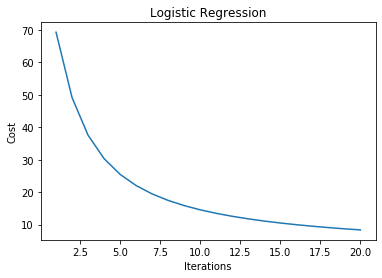

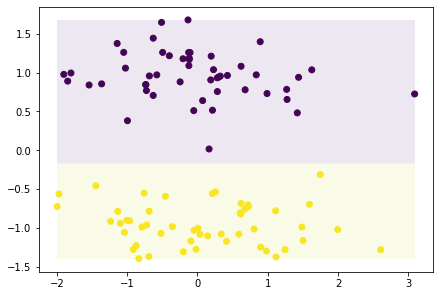

In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


def STD_skewed_data(X):
    X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

    print("Here, the mean of the Data is taken followed by taking STD of it. \
    This contraints the data which is why we get a slightly better result on boundary line than un-constraint work as shown above")
    beta = logistic_regression(X,20)
    plot_boundary_line(X,Y,beta)
STD_skewed_data(X)

# __Question I.1.2 Logistic vs OLS (3pts)__ 
Consider the dataset given below. On this dataset, __using the corresponding modules from scikit__, learn a linear regression classifier. Then learn a logistic classifier. How do the two approaches compare with each other? Display each each of the classifiers using 'meshgrid + contourf'

(32, 2)
(14, 2)


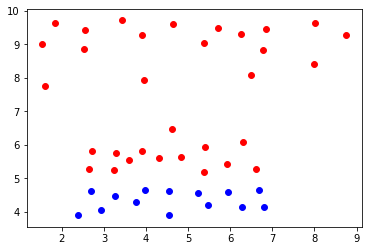

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

from sklearn.datasets import make_classification

data_class1 = sio.loadmat('XHW2_EX2_Class1.mat')['XHW2_EX2_Class1']
data_class2 = sio.loadmat('XHW2_EX2_Class2.mat')['XHW2_EX2_Class2']

print(data_class1.shape)
print(data_class2.shape)
plt.scatter(data_class1[:, 0], data_class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(data_class2[:, 0], data_class2[:, 1], marker='o', c='b',
            s=35)


plt.show()

# Solution: Logistic VS OLS Classification Using Scikit-Learn

# 1. For Logistic Regression Classifier

1. Create a Function that does logistic regression using Scikit Learn 
2. It will output a C-SVC linear classification which is with regularized parameters. 
3. It will also output a Logistic Regression Classifier without regularization
3. Write a function that displays the results 

# 2. For Linear Regression Classifier 

1. Write a Function to display Linear Regression Classification 
2. Call the Function for C-SVC Classification for reference 

In [36]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import scipy.io as sio
from sklearn.svm import SVC

def Regression_classifier_Scikit(data_class1, data_clas2):
    Class1 = np.hstack((data_class1[:,0].reshape(-1,1),data_class1[:,1].reshape(-1,1)))
    Class2 = np.hstack((data_class2[:,0].reshape(-1,1),data_class2[:,1].reshape(-1,1)))
    data = np.vstack((Class1,Class2))
    print("Data shape: ",data.shape)

    target1 = np.ones((np.shape(data_class1[:,1])[0],1))
    target2 = -np.ones((np.shape(data_class2[:,1])[0],1))
    target = np.vstack((target1,target2))
    print("Target shape: ",target.shape)

    clf = SVC(kernel = 'linear',gamma = 5,max_iter = 500)
    clf1 = clf.fit(data,target)

    clf2 = LogisticRegression(random_state = 0,solver ="lbfgs",max_iter = 18)
    clf2 = clf2.fit(data,target)
    
    clf3 = LinearRegression()
    clf3 = clf3.fit(data,target)

    return clf1, clf2,clf3, data

In [37]:
def plot_classifer(clf1,clf2,clf3,data):
    x1min = np.amin(data[:,0])
    x1max = np.amax(data[:,0])
    x2min = np.amin(data[:,1])
    x2max = np.amax(data[:,1])

    x1mesh = np.linspace(x1min, x1max, 100)
    x2mesh = np.linspace(x2min, x2max, 100)

    x1MeshMat, x2MeshMat = np.meshgrid(x1mesh, x2mesh)

    x1MeshMat_vec = x1MeshMat.flatten()
    x2MeshMat_vec = x2MeshMat.flatten()

    Mesh_grid = np.vstack((x1MeshMat_vec, x2MeshMat_vec)).T

    target1 = clf1.predict(Mesh_grid)
    print("target SVC vector 1: ",target1)
    target2 = clf2.predict(Mesh_grid)
    print("target Logistic vector 2:",target2.T)
    
    target3 = clf3.predict(Mesh_grid)
    print("target OLS vector 2:",target2.T)
    
    import warnings
    warnings.filterwarnings("ignore")
    plt.contourf(x1MeshMat,x2MeshMat, np.reshape(target1, np.shape(x1MeshMat)),alpha = 0.1)
    plt.scatter(data_class1[:, 0], data_class1[:, 1], marker='o', c='r',s=35)
    plt.scatter(data_class2[:, 0], data_class2[:, 1], marker='o', c='b',s=35)
    plt.show()
    print("Above is classification with the C-SVC Regularization Parameter!")
    
    plt.contourf(x1MeshMat,x2MeshMat, np.reshape(target2.T, np.shape(x1MeshMat)),alpha = 0.1)
    plt.scatter(data_class1[:, 0], data_class1[:, 1], marker='o', c='r',s=35)
    plt.scatter(data_class2[:, 0], data_class2[:, 1], marker='o', c='b',s=35)
    plt.show()
    print("Above is Logistic Classification!")
    
    plt.contourf(x1MeshMat,x2MeshMat, np.reshape(target3.T, np.shape(x1MeshMat)),alpha = 0.1)
    plt.scatter(data_class1[:, 0], data_class1[:, 1], marker='o', c='r',s=35)
    plt.scatter(data_class2[:, 0], data_class2[:, 1], marker='o', c='b',s=35)
    plt.show()
    print("Above is Linear (OLS) Classification!")

Data shape:  (46, 2)
Target shape:  (46, 1)
target SVC vector 1:  [-1. -1. -1. ...  1.  1.  1.]
target Logistic vector 2: [-1. -1. -1. ...  1.  1.  1.]
target OLS vector 2: [-1. -1. -1. ...  1.  1.  1.]


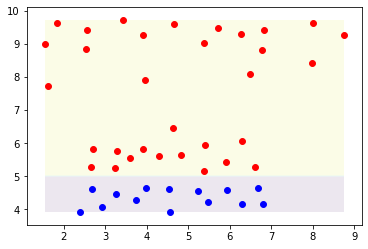

Above is classification with the C-SVC Regularization Parameter!


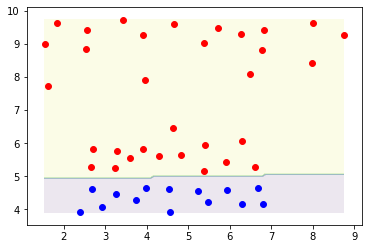

Above is Logistic Classification!


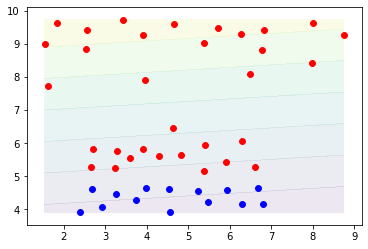

Above is Linear (OLS) Classification!


In [38]:
'''Display Results'''
clf1, clf2, clf3, data = Regression_classifier_Scikit(data_class1, data_class2)
plot_classifer(clf1,clf2,clf3,data)


## Exercise II: Maximal Margin classifier and non linearly separable data (10pts)

So far we have studied Maximal Margin classifier when the data was linearly separable. In this case, the plane will naturally position itself in between the two classes. The formulation in the linearly separable case is of the form

$$\max_{\mathbf{w}, b_0}\min_{i} \frac{y(\mathbf{x}^{(i)})t^{(i)}}{\|\mathbf{w}\|} = \max_{\mathbf{w}, b_0}\min_i \frac{(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)t^{(i)}}{\|\mathbf{w}\|}$$

This formulation is not very nice because the optimization variable appears at the denominator. Note that the formulation $(*)$ can be written as 

\begin{align}
\max_{\gamma, \mathbf{w}, b_0} & \quad \frac{\gamma}{\|\mathbf{w}\|} \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq \gamma 
\end{align}

Here we simply introduce the parameter $\gamma$ to represent the margin (smallest distance between any point from the dataset and the plane). An important thing to notice when looking at $(**)$ is that any solution for $\mathbf{w}, b_0, \gamma$ can generate an other solution with the same objective by simply scaling it with a positive weight $\alpha$. Indeed if $\mathbf{w},b_0, \gamma$ is an optimal solution to $(**)$, it is easy to check that $\alpha \mathbf{w}, \alpha \gamma, \alpha b_0$ will be a valid solution as well. Since we only need one solution, we can choose to optimize over the set of solution such that $\gamma = 1$. Concretely this means that for each 'line' of solution $(\alpha \gamma, \alpha b_0, \alpha \mathbf{w})$, we only retain the $\alpha$ corresponding to $\alpha\gamma = 1$. The problem then becomes

\begin{align}
\max_{\mathbf{w}, b_0} & \quad \frac{1}{\|\mathbf{w}\|} \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1.
\end{align}

To get the final formulation, note that the maximum value for $1/\|\mathbf{w}\|$ is achieved when $\|\mathbf{w}\|$ is the smallest. We an thus solve the problem

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\| \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1., \quad\quad (***) 
\end{align}



So far we have assumed that the dataset was linearly separable. In this case, all the points will satisfy $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$. Sometimes, however, we could be in a situation where the dataset is not linearly separable and there are points which will be misclassified so that $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$ might be negative. To account for such situation, we will consider slack variables $\xi_i$ and use a more general formulation of the form

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\| + C\sum_{i} \xi_i \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1 - \xi_i., \quad\quad (***) 
\end{align}

It is in fact possible to write formulation $(***)$ as an unconstrained optimization problem. Recall that we decided to set the minimum margin to $1$. This in particular means that all the points that are correctly classified should satisfy $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$. The approach encoded in $(***)$ corresponds to penalazing those points for which $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)<1$. As soon as we have a positive value for one of the variables 


# Question II.1 Hinge Loss (3pts)

We consider the hinge loss $\ell(x, y) = \max(0, 1-x\cdot y)$ for $x = t^{(i)}$ and $y = (\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$. Note that if $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 0$ (meaning the pair $\left\{\mathbf{x}^{(i)}\right\}$ is correctly classified), the output of the hinge function is $0$. On the other hand, if $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)<0$ (which corresponds to a pair that is incorrectly classified, as can occur when the data is not linearly separable), then the cost is $1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$ (i.e. we can think of this cost as by how much we violate the constraint $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$).  From this, we can now write the objective as

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\|^2 + C\sum_{i} \max(0, 1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0))
\end{align}

Instead of weighting the constraints, we can weight the first term. This gives a similar formulation of the form

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \frac{1}{N}\sum_{i=1}^{N} \left\{\frac{\lambda}{2} \|\mathbf{w}\|^2 + \max(0, 1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0))\right\}\quad (****)
\end{align}

The PEGASOS algorithm finds the corresponding Soft Margin classifier by applying batch gradient descent to this last objective. 

What is the gradient of the Hinge loss?


# Solution: 
**Hinge Loss**

__Mathematical Base__
$$
\ell(x, y) = \max(0, 1-x\cdot y)
$$
for $x = t^{(i)}$ and $y = (\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$. Opening up yields:
$$
\ell(x, y) = \max(0, 1-t^{(i)}\cdot (\mathbf{w}^T\mathbf{x}^{(i)} + b_0))
$$

**Gradient of Hinge Loss yields:**
$$
∂l(x,y)= 
\begin{cases}
0 & t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1\\
-t^{(i)}x^{(i)} & t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) < 1\\
\end{cases}
$$

As stated in question, objective function along with regulariation term is:
\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \frac{1}{N}\sum_{i=1}^{N} \left\{\frac{\lambda}{2} \|\mathbf{w}\|^2 + \max(0, 1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0))\right\}\quad 
\end{align}

Gradient of Objective Function:
$$
∂ \text{obj func}= 
\begin{cases}
\lambda w & t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1\\
\lambda w -t^{(i)}x^{(i)} & t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) < 1\\
\end{cases}
$$


## For this problem, Function " HingeLoss_Gradient " will be used


In [39]:
def hingLoss_nonVectorized(X, t, w, b):
    '''Answer the question above by '''
    ''' Non-Vectorized Form Implementation of HingeLosee'''
    num_examples = X.shape[0]
    hingeLoss = 0.0
    for example in range(num_examples):
        x_i = X[example,:]
        t_i = t[example]
        hingeLoss += max(0,1 - t_i * (np.dot(w,x_i) + b) ) 
    print(hingeLoss)
    return hingeLoss

def hingLoss_vectorized(X, t, w, b):
    '''Vectorized Form Implementation of HingeLoss '''
    ## vectorized form
    y_yhat = t * (np.dot(X,w) + b)
    loss_per_example = np.maximum(0, 1 - y_yhat)
    hingeLoss = np.sum(loss_per_example)
    
    print(hingeLoss)
    return hingeLoss

def gradient_regularized_obj_func_using_hingLoss(X_i, t_i, w, b0, lambda0):
    ''' Calculates the Gradient of the HingeLoss'''
    gradient = lambda0 * w
    y_yhat = t_i * (np.dot(w.T,X_i) + b0)
    if y_yhat < 1:
        gradient -= X_i * t_i
    print("Grad: ",gradient)
    return gradient

''' For this Question, HingeLoss_Gradient will be used: Dual-combined Code'''
def hingeLoss_Gradient(X,t,w):
    cost = np.dot(t,w)
    t = np.reshape(t,(len(t),1))
    if cost < 1: 
        grad = np.dot(np.transpose(X),t)
        print("grad: ",grad)
        return grad
    else: 
        return 0

# Question II.2 Maximum Margin Classifier from scratch (7pts)

Using your answer to question II.2.1 above, implement the PEGASOS algorithm. Use a simple batch gradient descent approach with a sufficiently small learning rate (let us say $\eta = 1e-4$). Update the lambda as $1/t$ where $t$ is the step counter. 

# Mathematical Base for Pegasos
The update step for $w$ in GD is as follows:
$$
w = w - \eta \partial J(w)
$$

There are two solutions to $\partial J(w)$ depending upon the size of $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$. 

If $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1$,

$$
w = w - \eta \lambda w =  (1-\eta \lambda)w
$$

If $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) < 1$,

$$
w = w - \eta (\lambda w - t^{(i)}x^{(i)}) 
$$
$$
w = w - \eta \lambda w + \eta t^{(i)}x^{(i)}
$$
$$
w = (1 - \eta \lambda) w + \eta t^{(i)}x^{(i)}
$$

## For this Question, Func " approximatePEGASOS "  is used

In [40]:
def approximatePEGASOS(X, t, lambda0, eta,max_iter):
        '''The function takes as input a set of sample pairs {x^{(i)}, t_^{(i)}} as well as an initial value for b0 
    and a value for the learning rate eta. It should return the weight vector w and the bias b0 
    for the Max Margin Classifier'''
        
        weight = np.zeros((len(X[0])+1,1))
      
        X = np.hstack((X,np.ones((len(X),1))))
        for i in range(max_iter):
            y = np.dot(X,weight)
            returned_grad = hingeLoss_Gradient(X,t,y)
            updated_grad = lambda0*weight - returned_grad
            weight = weight - eta*updated_grad
        print("weight: ",weight)
        return weight

''' Following coding is done from the PEGASOS Original Algorithm'''
def Approximate_PEGASOS(X, t, lambda0, eta, max_epoch):

    w = np.zeros((X.shape[0]))
    b0 = 0
    epoch = 1
    #eta = np.exp(-4)
    num_instances, num_features = X.shape[0], X.shape[1]
    while(epoch <= max_epoch):
        randomly_shuffled = np.random.permutation(num_instances)
        for r_instance in randomly_shuffled:
            gradient_single_point =  gradient_regularized_obj_func_using_hingLoss(X[r_instance], t[r_instance], w[r_instance], b0, lambda0)
            print("eta", eta * gradient_single_point)
            w = w - eta * gradient_single_point
        epoch += 1
       
#In case of following Pegosos line by line
#             y_yhat = t[r_instance] * (np.dot(X[r_instance],w) + b0)
#             if y_yhat < 1:
#                 w = (1 - eta*lambda0) * w + (eta * t[r_instance] * X[r_instance])
#             else:
#                 w = (1 - eta*lambda0) * w
    return w, b0

## Apply the algorithm to the dataset below

(150, 2)
(150,)


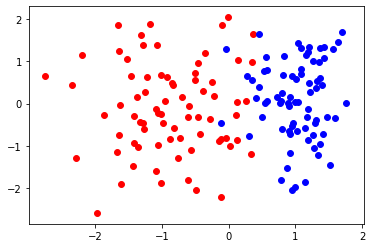

In [41]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X = np.load('Ex2_HW2_X.npy') 
Y = np.load('Ex2_HW2_t.npy') 

print(X.shape)
print(Y.shape)
XEx2_Class1 = X[Y==0,:]
XEx2_Class2 = X[Y==1,:]

plt.scatter(XEx2_Class1[:, 0], XEx2_Class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(XEx2_Class2[:, 0], XEx2_Class2[:, 1], marker='o', c='b',
            s=35)

plt.show()


### Following is the Display Function for PEGASOS to display classification or Boundary line

In [42]:
def display_pegasos(X,Y,beta):
    x1min = np.amin(X[:,0])
    x1max = np.amax(X[:,0])
    x2min = np.amin(X[:,1])
    x2max = np.amax(X[:,1])

    x1mesh = np.linspace(x1min, x1max, 100)
    x2mesh = np.linspace(x2min, x2max, 100)

    x1MeshMat, x2MeshMat = np.meshgrid(x1mesh.reshape(-1,1), x2mesh.reshape(-1,1))
    x1MeshMat = x1MeshMat.flatten()
    x2MeshMat = x2MeshMat.flatten()

    X12 = np.vstack((x1MeshMat, x2MeshMat)).T
    totalNumPointsGrid = len(x1MeshMat)
    addon = np.ones((totalNumPointsGrid, 1))
    pointsGrid = np.hstack((addon.reshape(-1,1), X12))
    prediction = np.dot(pointsGrid, beta)

    prediction[prediction<.5] = 0
    prediction[prediction>.5] = 1

    coordinatesX1 = np.reshape(x1MeshMat, (100,100))
    coordinatesX2 = np.reshape(x2MeshMat, (100,100))
    reshaped_prediction = np.reshape(prediction, (100,100))

    fig, ax = plt.subplots(constrained_layout=True)
    plt.scatter(X[:,0], X[:,1], c = Y)
    ax.contourf(coordinatesX1, coordinatesX2, reshaped_prediction.T, alpha=0.1)
    plt.show()

### Heads up: If you face Shape error of (10000,3) and (4,1), re-run the cells as sometimes they carry information from other cells

grad:  [[75.79905172]
 [ 6.71841705]
 [75.        ]]
weight:  [[0.27898863]
 [0.02472804]
 [0.27604762]]


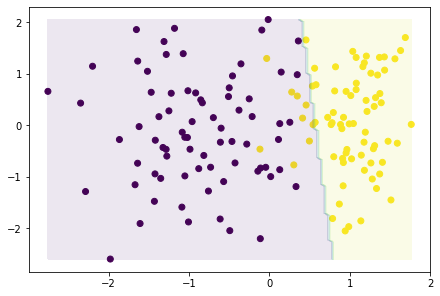

In [43]:
weight = approximatePEGASOS(X,Y,0.1, 0.01,1000)
X = np.hstack((X,np.ones((len(X),1))))
display_pegasos(X,Y,weight)

# Bonus II.3. dynamic learning rate. (3pts) 
The exact PEGASOS algorithm updates the learning rate dynamically as $\eta_t = 1/{(\lambda \cdot  t)}$ for some particular choice of $\lambda$ and where $t$ denotes the step counter. Modify the approximate version of the PEGASOS algorithm that you derived in question II.2.2 to make it work with such a dynamical learning rate. 

# Solution

Just as Approximate Pegasos Function, it will be same here except we will use dynamic learning rate defined as: 
$$ \eta_t = 1/{(\lambda \cdot  t)} $$

In [47]:
def dynamic_approximatePEGASOS(X, t, lambda0,max_iter):

        weight = np.zeros((len(X[0])+1,1))
        X = np.hstack((X,np.ones((len(X),1))))
        for i in range(1,max_iter,1):
            ''' Dynamic Eta Value'''
            eta = np.true_divide(1,(lambda0*i))
            
            y = np.dot(X,weight)
            returned_grad = hingeLoss_Gradient(X,t,y)
            updated_grad = lambda0*weight - returned_grad
            weight = weight - eta*updated_grad
        print("weight: ",weight)
        return weight

In [48]:
X = np.load('Ex2_HW2_X.npy') 

grad:  [[75.79905172]
 [ 6.71841705]
 [75.        ]]
weight:  [[0.47421829]
 [0.04203214]
 [0.46921922]]


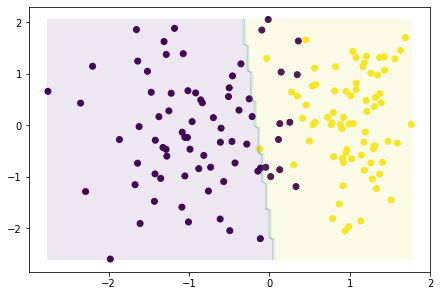

In [49]:
weight = dynamic_approximatePEGASOS(X,Y,0.16,1000)
X = np.hstack((X,np.ones((len(X),1))))
display_pegasos(X,Y,weight)

# Exercise III: Computational drug design: Part I, Training on Thrombin (10pts)

With the recent spreading of the COVID-19 "Corona" Virus. Many initiatives relying on Machine Learning, have been taken to find new drugs that would be able to prevent the virus from infecting host cells. The Human Angiotensin-Converting Enzyme 2 (ACE2) has been proved by many studies to be the specific receptor for the Spike RBD of SARS-CoV. A common approach (followed for example for researchers at Oak Ridge National Laboratory) is to design compounds (such as the one shown in gray in the figure above) that would be able to bind to the SARS-CoV-2 spike protein (shown in cyan), thus making the virus unable to dock to the human ACE2 receptors (shown in purple in the figure below). 

<img src="corona.png" width="400">


Source: [Physics.org](https://phys.org/news/2020-03-early-drug-compounds-supercomputing-combat.html)


We do not have enough data on the COVID-19 yet so we are going to train on an older computational drug design dataset from NIPS 2003. The general idea is the same. A Drug is a small organic molecule that can achieve its desired activity by binding to a target site on a receptor. The first step in the discovery of a new drug is usually to identify and isolate the receptor to which it should bind, followed by testing many small molecules for their ability to bind to the target site (see the [UCI ML Repo](https://archive.ics.uci.edu/ml/datasets/Dorothea) for more details). For this particular dataset, we are interested in checking which compounds can or cannot bind to thrombin. 

# Question III.1 (4pts)
Start by downloading the DOROTHEA dataset on the [UCI ML website ](https://archive.ics.uci.edu/ml/datasets/Dorothea). Once you have downloaded the data, as we did for face recognition, use the PCA module from scikit-learn to reduce the dimension of your feature vectors from their initial size (100000) to about 100. Split the data into a training and test part using the train_test_split module from scikit learn  

# Solution 
 1. Create a Function to Read Data and Split the lines 
 
 2. Create another Function to split the data into Test and Train using PCA

In [521]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def reading_data():
    label = open('dorothea_train.labels', "r")
    label = label.read()
    label = label.split()
    label = [int(i) for i in label]
    targets = np.array(label)
    
    f = open('dorothea_train.data', "r")
    line_read = f.readline()
    line_read = map(int, line_read.split())

    maxNumData = 800
    tmp = np.zeros((maxNumData, 100000))
    for i in range(maxNumData):
        line = f.readline()
        line = map(int, line.split())
        for j in line: 
            tmp[i][j-1] = 1
    print("Shape of tmp: ",tmp.shape)

    return tmp,targets

# computing PCA and Use the PCA module to reduce compress the feature vectors
def compute_PCA(tmp, targets):
    pca = PCA(n_components=100)
    pca.fit(tmp)
    tmp_transformed = pca.transform(tmp)
    print("Tmp Transform Shape: ",tmp_transformed.shape)
    X_train, X_test,Y_train,Y_test = train_test_split(tmp_transformed,targets,test_size =0.01)

    return X_train, X_test, Y_train, Y_test


In [522]:
''' Print out some of the Values of dataset'''
tmp, targets = reading_data()
X_train, X_test,Y_train,Y_test = compute_PCA(tmp, targets)

Shape of tmp:  (800, 100000)
Tmp Transform Shape:  (800, 100)


 # Question III.2 (6pts)

Once you have learned the compressed representation for your samples, learn the following two classifiers

- SVC with RBF kernel (Combine the SVC with GridSearchCVto determine the optimal values for $C$ (how much you penalize misclassification) and $\gamma$ (width of kernel)). To start you can take your grid to be defined as below

param_grid = {'C': [1e2, 5e2, 1e3, 1e4, 5e4],
              'gamma': [0.0005, 0.001, 0.005, 0.01, 0.1], }

Keep in mind that larger $\gamma$ means smaller kernel. I.e. $K(x, y) = exp(-gamma ||x-y||^2)$. $C$ is defined as in exercise II. 

- Logistic regression classifier 

# Solution

1. Create a Function that carries Grid Search using Scikit SCV 

2. Create another Function that does Grid Search using Scikit Logisitc Regression 

3. Print out the fit model, the Best Estimate, and the Score

In [523]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings

param_grid_SVC = {'C': [1e2, 5e2, 1e3, 1e4, 5e4], 'gamma': [0.0005, 0.001, 0.005, 0.01, 0.1], }
def Grid_search_SCV(param_grid_SVC):
    
    clf = GridSearchCV(SVC(kernel = "rbf", class_weight = 'balanced'), param_grid_SVC)
    print("first clf: ",clf)
    best_model = clf.fit(X_train, Y_train)
    print("***************************************************************************************")
    print("Grid Search SVC Best Estimator: ",best_model.best_estimator_)
    print("***************************************************************************************")
    print("Grid Search SVC Score: ",clf.score(X_test, Y_test), "(",(clf.score(X_test, Y_test))*100,"%)")
    print("***************************************************************************************")

    return

param_grid_log = {'C': [1e2, 5e2, 1e3, 1e4, 5e4] }
def Grid_Search_logistic_Reg(param_grid_log):
    clf = GridSearchCV(LogisticRegression(random_state = 0), param_grid_log)
    print("first clf: ",clf)
    print("***************************************************************************************")
    clf = clf.fit(X_train, Y_train)
    warnings.filterwarnings("ignore")
    print("Grid Search Logistic Regression Best Estimator: ",clf.best_estimator_)
    print("***************************************************************************************")
    print("Grid Search Logistic Regression Score: ",clf.score(X_test, Y_test),"(",(clf.score(X_test, Y_test))*100,"%)")
    print("***************************************************************************************")
    
    return 
Grid_search_SCV(param_grid_SVC)
Grid_Search_logistic_Reg(param_grid_log)

first clf:  GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100.0, 500.0, 1000.0, 10000.0, 50000.0],
                         'gamma': [0.0005, 0.001, 0.005, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
***************************************************************************************
Grid Search SVC Best Estimator:  SVC(C=100.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=

### Bonus : Computational drug design. Part II: Tackling COVID-19

Now that you understand the basic idea behind computational drug design, we are ready to try to tackle the real challenge. A couple of days ago, Sage Health started a competition which was aimed at developing new drugs to fight corona virus. The competition, which was [advertised through youtube](https://www.youtube.com/watch?v=1LJgkovowgA), is now closed. However it would be interesting to see whether anybody could make additional discoveries from the data. Check the competition video and try to implement some of the step, using the data from the github pages of the winners (see here for the main [SageHealth webpage](https://www.sage-health.org/) and [https://www.sage-health.org/coronavirus/](here for the links to each of the winners github pages)) 

Points for this question depends on how far you can go. 